# Lineer Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv("big_mart_sales.csv")
data.head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528


## Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Weight and Outlet_Size have missing values. We have 5 numerical and 6 non-numerical features.

In [4]:
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Identifier have many unique values. We may want to drop this feature.

In [5]:
data.drop('Item_Identifier', axis=1, inplace=True)
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We should convert LF, low fat values to Low Fat and reg to Regular

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

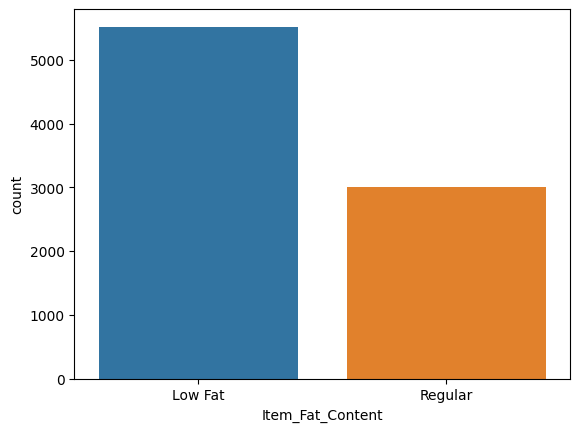

In [7]:
dictionary = {'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}
data['Item_Fat_Content'].replace(dictionary, inplace=True)
sns.countplot(x=data["Item_Fat_Content"])

<AxesSubplot:xlabel='count', ylabel='Outlet_Identifier'>

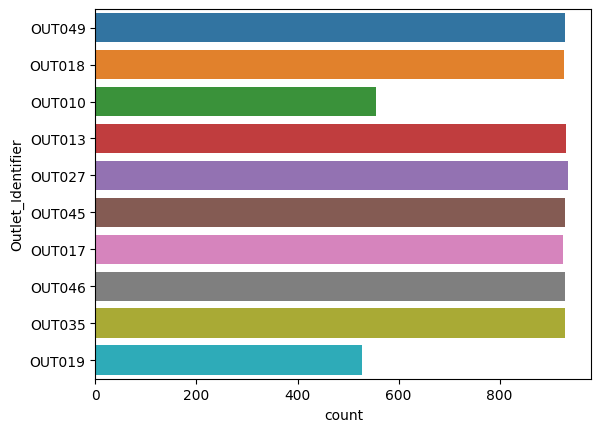

In [8]:
# data['Outlet_Identifier'].value_counts()
sns.countplot(y=data["Outlet_Identifier"])

<AxesSubplot:xlabel='count', ylabel='Item_Type'>

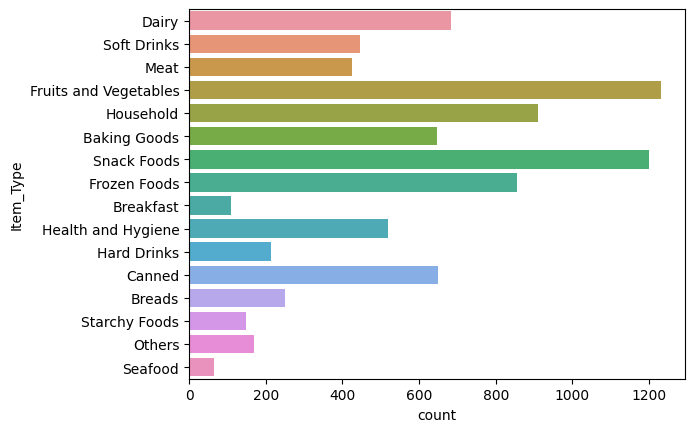

In [9]:
sns.countplot(y=data["Item_Type"])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

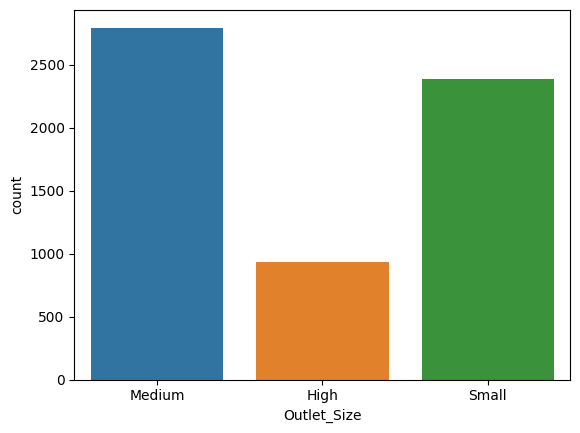

In [10]:
sns.countplot(x=data["Outlet_Size"])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

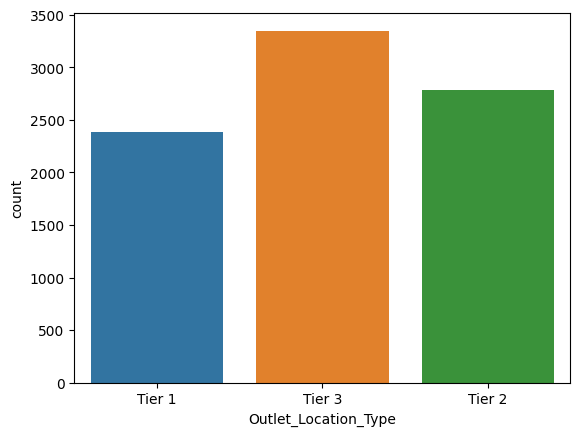

In [11]:
sns.countplot(x=data["Outlet_Location_Type"])

<AxesSubplot:xlabel='count', ylabel='Outlet_Type'>

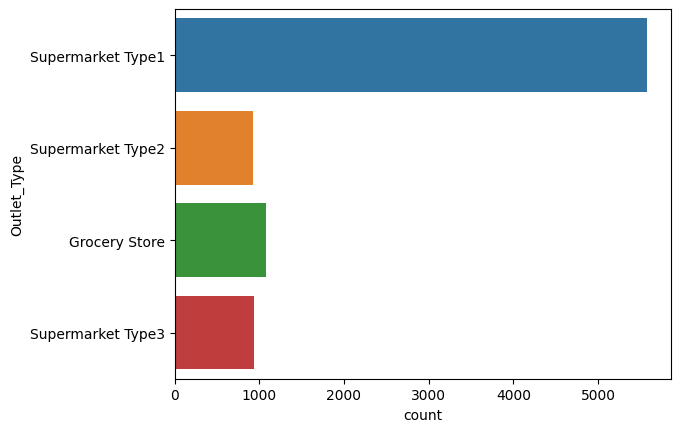

In [12]:
sns.countplot(y=data["Outlet_Type"])

<AxesSubplot:>

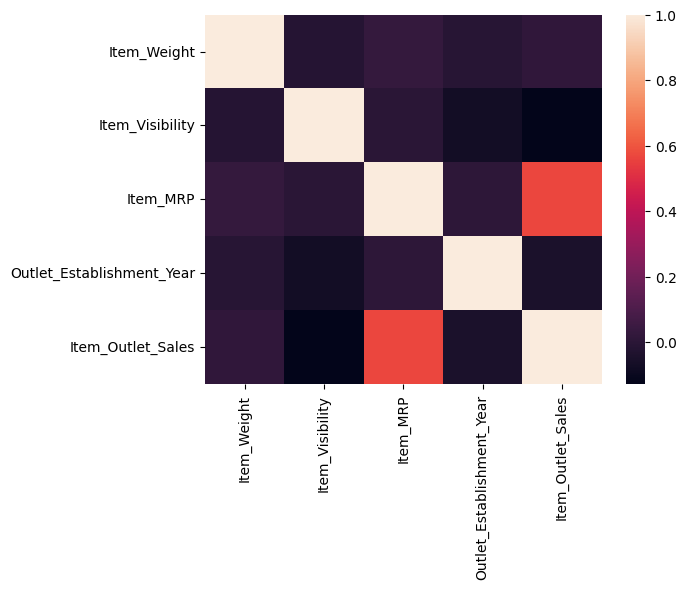

In [13]:
sns.heatmap(data.corr())

Item_MRP has the strongest positive correlation with the Item_Outlet_Sales

## Imputing Missing Values

In [14]:
# Imputing the numerical missing values with mean
item_weight_median = data['Item_Weight'].mean()
data['Item_Weight'].fillna(item_weight_median, inplace=True)

# Imputing the non-numerical missing values with mode
outlet_size_mode = data['Outlet_Size'].mode()[0]
data['Outlet_Size'].fillna(outlet_size_mode, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


## Encoding Categorical Variables

For the Outlet_Size and Outlet_Location_Type feature we can do label encoding. This way order will be protected. For other non-numerical features we can use one-hot encoding. 

In [15]:
data['Outlet_Size'] = data['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2})
data['Outlet_Location_Type'] = data['Outlet_Location_Type'].map({'Tier 3': 3, 'Tier 2': 2, 'Tier 1': 1})

In [16]:
data.head(7)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,2,3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,1,3,Supermarket Type2,556.6088
6,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,2,3,Supermarket Type1,343.5528


In [17]:
from sklearn.preprocessing import OneHotEncoder

cat_attribs = ["Item_Fat_Content", "Item_Type", "Outlet_Type"]

one_hot_encoder = OneHotEncoder(sparse=False)
big_mart_cat_one_hot_encoder = one_hot_encoder.fit_transform(data[cat_attribs])
df_cat = pd.DataFrame(big_mart_cat_one_hot_encoder, columns=one_hot_encoder.get_feature_names_out())

data.drop(["Item_Fat_Content", "Item_Type", "Outlet_Type", "Outlet_Identifier"], axis=1, inplace=True)
data = pd.concat([data, df_cat], axis=1)
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,1,1,3735.1380,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,0.019278,48.2692,2009,1,3,443.4228,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,17.50,0.016760,141.6180,1999,1,1,2097.2700,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,0.000000,182.0950,1998,1,3,732.3800,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.93,0.000000,53.8614,1987,2,3,994.7052,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Feature Transformation

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>]],
      dtype=object)

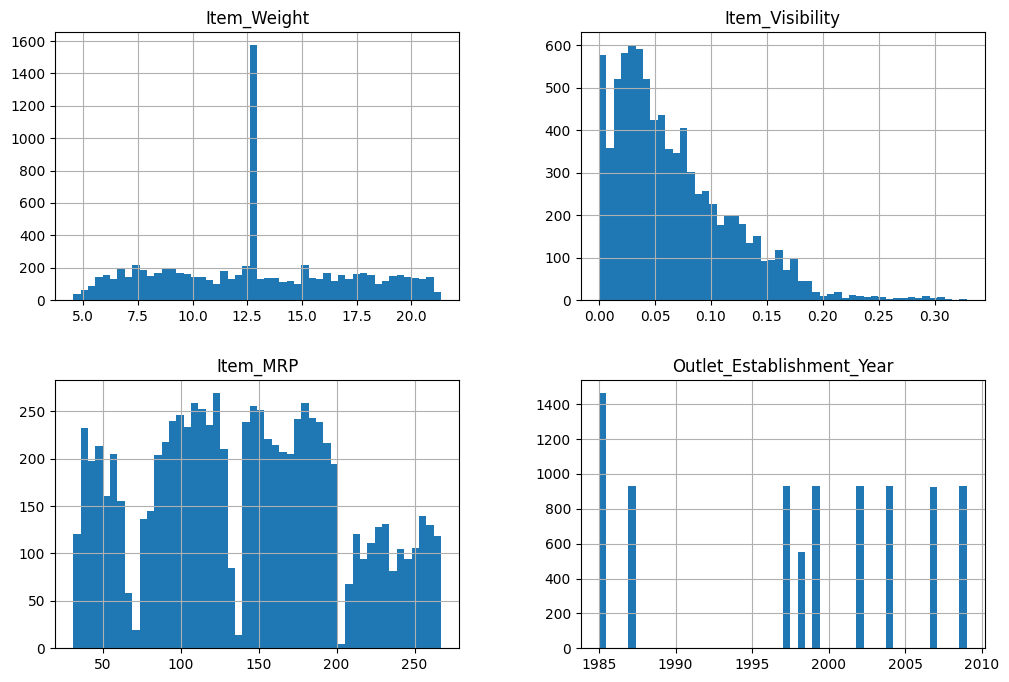

In [18]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
data[num_cols].hist(bins=50, figsize=(12, 8))

Item_Visibility has right skewed distrubition. We can take root of this feature. In this way we can get normal distrubition.

<AxesSubplot:>

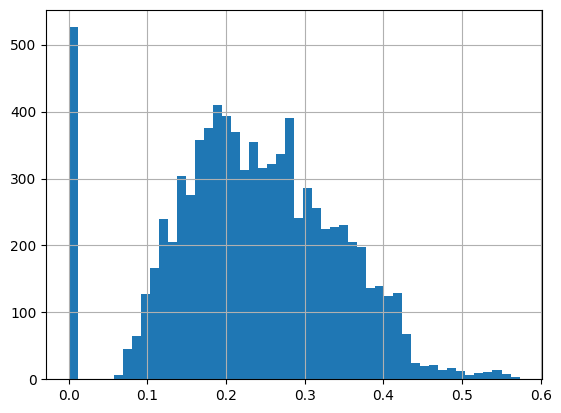

In [19]:
item_visibility_squareroot = np.sqrt(data['Item_Visibility'])
item_visibility_squareroot.hist(bins=50)

## Seperating Features and Target

In [20]:
X = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']
X.shape, y.shape

((8523, 28), (8523,))

## Scaling Data

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.841872,-0.970732,1.747454,0.139541,0.284581,-1.369334,0.738147,-0.738147,-0.286855,-0.174193,...,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.381529,0.726802,-0.349551,-0.351028
1,-1.641706,-0.908111,-1.489023,1.334103,0.284581,1.091569,-1.354743,1.354743,-0.286855,-0.174193,...,-0.229090,-0.142232,-0.086982,-0.404805,4.260611,-0.132935,-0.381529,-1.375891,2.860816,-0.351028
2,1.098554,-0.956917,0.010040,0.139541,0.284581,-1.369334,0.738147,-0.738147,-0.286855,-0.174193,...,4.365102,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.381529,0.726802,-0.349551,-0.351028
3,1.500838,-1.281758,0.660050,0.020085,0.284581,1.091569,-1.354743,1.354743,-0.286855,-0.174193,...,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,2.621031,-1.375891,-0.349551,-0.351028
4,-0.929428,-1.281758,-1.399220,-1.293934,1.950437,1.091569,0.738147,-0.738147,-0.286855,-0.174193,...,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.381529,0.726802,-0.349551,-0.351028


## Creating Train and Test Sets

In [22]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2,random_state = 39)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((6818, 28), (1705, 28), (6818,), (1705,))

## Training Model

In [23]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

### Train Error

In [24]:
# Making predictions the Train Set and calculating mae
train_predict = model.predict(train_x)
train_error = mean_absolute_error(train_predict, train_y)
train_error

835.1663179210783

### Test Error

In [25]:
# Making predictions over the Test Set and calculating mae
test_predict = model.predict(test_x)
test_error = mean_absolute_error(test_predict, test_y)
test_error

842.0310185573834

## Model Score

In [26]:
model.score(test_x, test_y)

0.5742025591835411